##### Import Library

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# DATA CLEANSING
##### 1. Membaca dan melihat Data

In [2]:
df = pd.read_excel("LaporanIklimHarian2011-2020.xlsx")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654 entries, 0 to 3653
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Tanggal  3654 non-null   object
 1   Tn       3519 non-null   object
 2   Tx       3562 non-null   object
 3   Tavg     3583 non-null   object
 4   RH_avg   3544 non-null   object
 5   RR       2986 non-null   object
 6   ss       3532 non-null   object
dtypes: object(7)
memory usage: 200.0+ KB


,Tanggal,Tn,Tx,Tavg,RH_avg,RR,ss
0,01-01-2011,24,32.4,27.5,83,0,3.2
1,02-01-2011,25,33.5,27.7,81,0,3.9
2,03-01-2011,23,30.3,26.6,84,0.5,0
3,04-01-2011,23,32.4,27,82,3.3,5.5
4,05-01-2011,22,29.9,24.7,93,26.2,0.3


##### Informasi data:
1. Tanggal = tanggal data direkam
2. Tn = temperatur minimum (derajat Celcius)
3. Tx = temperatur maksimum (derajat Celcius)
4. Tavg = temperatur rata-rata (derajat Celcius)
5. RH_avg = rata-rata kelembaban (%)
6. RR = curah hujan (mm)
7. ss = lamanya penyinaran matahari (jam)

Berdasarkan informasi mengenai dataset, masih terdapat data hilang dalam tabel.

##### 2. Memeriksa dan cleansing data yang hilang

Data dengan nilai '8888' pada kolom RR memiliki arti tidak dapat diukur

In [3]:
df['RR'] = df['RR'].replace([8888],[''])

Mengambil informasi tahun dari kolom Tanggal

In [4]:
split_tanggal = df['Tanggal'].str.split('-', expand=True).rename(columns={0:'Hari',1:'Bulan',2:'Tahun'})
split_tanggal
df['Tanggal'] = split_tanggal['Tahun']
df = df[df['Tanggal'].notna()]
df.head()

,Tanggal,Tn,Tx,Tavg,RH_avg,RR,ss
0,2011,24,32.4,27.5,83,0,3.2
1,2011,25,33.5,27.7,81,0,3.9
2,2011,23,30.3,26.6,84,0.5,0
3,2011,23,32.4,27,82,3.3,5.5
4,2011,22,29.9,24.7,93,26.2,0.3


In [5]:
#memeriksa apakah ada data null
dataHilang = [df['Tanggal'].isna().sum(), 
              df['Tn'].isna().sum(), 
              df['Tx'].isna().sum(), 
              df['Tavg'].isna().sum(), 
              df['RH_avg'].isna().sum(), 
              df['RR'].isna().sum(), 
              df['ss'].isna().sum()]
dataHilang

#Tanggal tidak memiliki data hilang, 
#Tn memiliki 132 data hilang, 
#Tx memiliki 92 data hilang,
#Tavg memiliki 71 data hilang,
#RH_avg memiliki 110 data hilang,
#RR memiliki 668 data hilang,
#ss memiliki 122 data hilang

[0, 135, 92, 71, 110, 668, 122]

Membuang baris yang memiliki curah hujan dengan nilai yang tidak diketahui

In [6]:
df = df[df['RR'].notna()]

Cleansing data dengan mengubah format data dan imputasi

In [7]:
#Mengubah format data
df['Tanggal'] = pd.to_numeric(df['Tanggal'],errors = 'coerce')
df['Tn'] = pd.to_numeric(df['Tn'],errors = 'coerce')
df['Tx'] = pd.to_numeric(df['Tx'],errors = 'coerce')
df['Tavg'] = pd.to_numeric(df['Tavg'],errors = 'coerce')
df['RH_avg'] = pd.to_numeric(df['RH_avg'],errors = 'coerce')
df['RR'] = pd.to_numeric(df['RR'],errors = 'coerce')
df['ss'] = pd.to_numeric(df['ss'],errors = 'coerce')

In [8]:
#mengisi data null dengan rata-rata
#Tn
rata_Tn = df['Tn'].mean()
df['Tn'] = df['Tn'].fillna(rata_Tn)

#Tx
rata_Tx = df['Tx'].mean()
df['Tx'] = df['Tx'].fillna(rata_Tx)

#Tavg
rata_Tavg = df['Tavg'].mean()
df['Tavg'] = df['Tavg'].fillna(rata_Tavg)

#RH_avg
rata_RH_avg = df['RH_avg'].mean()
df['RH_avg'] = df['RH_avg'].fillna(rata_RH_avg)

#ss
rata_ss = df['ss'].mean()
df['ss'] = df['ss'].fillna(rata_Tn)

Mengecek apabila masih ada data yang null

In [9]:
dataHilang = [df['Tanggal'].isna().sum(), df['Tn'].isna().sum(), df['Tx'].isna().sum(), df['Tavg'].isna().sum(), df['RH_avg'].isna().sum(), df['RR'].isna().sum(), df['ss'].isna().sum()]
dataHilang

[0, 0, 0, 0, 0, 362, 0]

In [10]:
df = df[df['RR'].notna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2623 entries, 0 to 3653
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Tanggal  2623 non-null   int64  
 1   Tn       2623 non-null   float64
 2   Tx       2623 non-null   float64
 3   Tavg     2623 non-null   float64
 4   RH_avg   2623 non-null   float64
 5   RR       2623 non-null   float64
 6   ss       2623 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 163.9 KB


In [11]:
df['RR'].min()

0.0

Mengubah variabel curah hujan (RR) menjadi variabel kategori berdasarkan pembagian kategori hujan pada BMKG

In [12]:
bins = [-0.5, 0.5, 19.9, 49.9, 100, 173]
group_names = ['Tidak Hujan','Hujan Ringan','Hujan Sedang', 'Hujan Lebat', 'Hujan Sangat Lebat']
df['RR'] = pd.cut(df['RR'], bins, labels=group_names)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2623 entries, 0 to 3653
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Tanggal  2623 non-null   int64   
 1   Tn       2623 non-null   float64 
 2   Tx       2623 non-null   float64 
 3   Tavg     2623 non-null   float64 
 4   RH_avg   2623 non-null   float64 
 5   RR       2623 non-null   category
 6   ss       2623 non-null   float64 
dtypes: category(1), float64(5), int64(1)
memory usage: 146.2 KB


Mengubah value variabel curah hujan (RR) menjadi 'Berpotensi banjir' dan 'Tidak berpotensi banjir' berdasarkan curah hujannya.

In [13]:
df['RR'] = df['RR'].replace(['Tidak Hujan','Hujan Ringan','Hujan Sedang', 'Hujan Lebat', 'Hujan Sangat Lebat'],['Tidak potensi banjir','Tidak potensi banjir','Tidak potensi banjir','Potensi banjir','Potensi banjir'])
df.head()

,Tanggal,Tn,Tx,Tavg,RH_avg,RR,ss
0,2011,24.0,32.4,27.5,83.0,Tidak potensi banjir,3.2
1,2011,25.0,33.5,27.7,81.0,Tidak potensi banjir,3.9
2,2011,23.0,30.3,26.6,84.0,Tidak potensi banjir,0.0
3,2011,23.0,32.4,27.0,82.0,Tidak potensi banjir,5.5
4,2011,22.0,29.9,24.7,93.0,Tidak potensi banjir,0.3


Mengubah value variabel curah hujan (RR) menjadi 0 dan 1,
</br> 0 = Tidak berpotensi banjir
</br> 1 = Berpotensi banjir

In [14]:
df['RR'] = df['RR'].replace(['Tidak potensi banjir','Potensi banjir'],[0,1])
df.head()

,Tanggal,Tn,Tx,Tavg,RH_avg,RR,ss
0,2011,24.0,32.4,27.5,83.0,0,3.2
1,2011,25.0,33.5,27.7,81.0,0,3.9
2,2011,23.0,30.3,26.6,84.0,0,0.0
3,2011,23.0,32.4,27.0,82.0,0,5.5
4,2011,22.0,29.9,24.7,93.0,0,0.3


##### 3. Eksplorasi data

1. Eksplorasi deskriptif

In [15]:
df.describe()

,Tanggal,Tn,Tx,Tavg,RH_avg,RR,ss
count,2623.000000,2623.000000,2623.000000,2623.000000,2623.000000,2623.000000,2623.000000
mean,2015.205490,24.182133,32.779229,27.430223,84.494899,0.046893,4.597891
std,3.007126,0.900366,1.528170,1.009749,5.623474,0.211450,3.661053
min,2011.000000,20.000000,24.800000,23.300000,58.000000,0.000000,0.000000
25%,2012.000000,24.000000,31.900000,26.800000,82.000000,0.000000,2.400000
50%,2015.000000,24.000000,33.000000,27.500000,85.000000,0.000000,4.400000
75%,2018.000000,25.000000,33.800000,28.100000,88.000000,0.000000,6.300000
max,2020.000000,27.200000,38.800000,33.300000,98.000000,1.000000,24.229376


2. Mencari korelasi data

<AxesSubplot:>

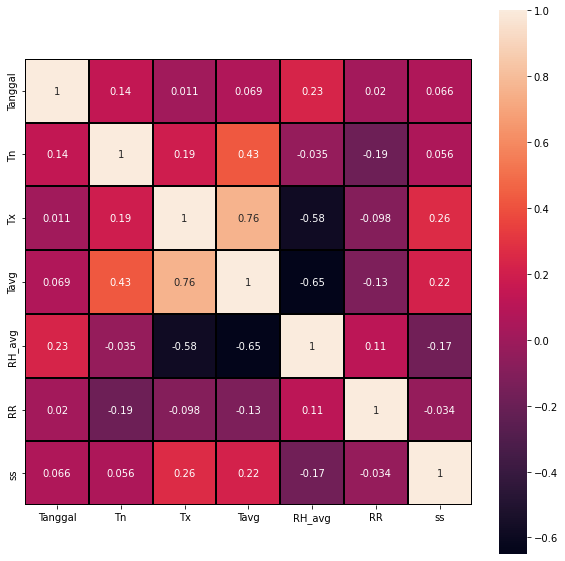

In [16]:
# untuk mencari tahu variabel / feature yang paling mempengaruhi target - Curah Hujan (RR)

#import library seaborn
import seaborn as sns

f, ax = plt.subplots(figsize = (10,10))

sns.heatmap(df.astype(float).corr(), linewidth=0.25, vmax=1.0, square=True, linecolor='black', annot=True)


Berdasarkan tabel korelasi di atas, feature-feature yang paling mempengaruhi target - Curah Hujan (RR) adalah: </br>
- Tn (Suhu minimal) </br>
- Tx (Suhu maksimal) </br>
- Tavg (suhu rata-rata) </br>
- RH_avg (rata-rata kelembaban)

3. Distribusi data

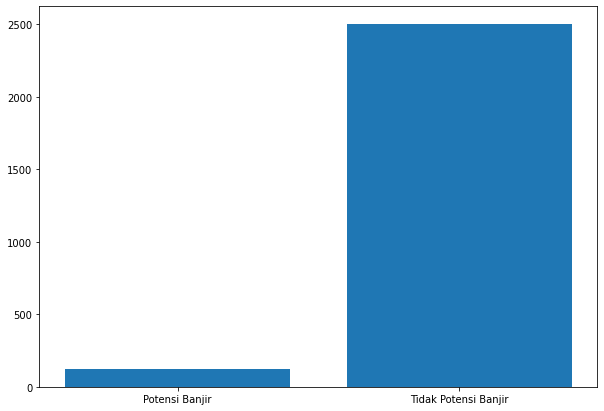

In [17]:
#Distribusi Curah Hujan (RR)
name = ['Potensi Banjir', 'Tidak Potensi Banjir']
value = [df.RR.value_counts()[1] , df.RR.value_counts()[0]]
 
# Figure Size
fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(name[0:2], value[0:2])
 
# Show Plot
plt.show()

Perbedaan jumlah sample yang cukup mencolok menandakan perlu melakukan stratified sampling dalam tahap Modeling

# MODELING

##### 1. Split Data

In [18]:
#library untuk split data
from sklearn.model_selection import train_test_split

In [19]:
#split dataset in features and target variable
feature_cols = ['Tn', 'Tx', 'Tavg', 'RH_avg']
x = df[feature_cols] #Features
y = df['RR'] # Target variable

In [20]:
#Split dataset menggunakan stratify sampling menjadi training set dan test set

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 2, stratify=y) #80% training and 20% test
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2098, 4)
(525, 4)
(2098,)
(525,)


##### 2. Membuat Model Decision Tree

##### Decision Tree Tanpa Pruning (C4.5)

In [21]:
from sklearn.tree import DecisionTreeClassifier

#Create Decision Tree classifier object
clf = DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [22]:
from sklearn import metrics

#Model Accuracy, how often is the classifier correct?
print ("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.900952380952381


[Text(0.475826178115016, 0.975, 'X[0] <= 23.45\ngini = 0.089\nsamples = 2098\nvalue = [2000, 98]'),
 Text(0.12285343450479233, 0.925, 'X[3] <= 84.5\ngini = 0.201\nsamples = 433\nvalue = [384, 49]'),
 Text(0.035942492012779555, 0.875, 'X[0] <= 21.5\ngini = 0.086\nsamples = 178\nvalue = [170, 8]'),
 Text(0.0231629392971246, 0.825, 'X[3] <= 81.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.016773162939297124, 0.775, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.029552715654952075, 0.775, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.048722044728434506, 0.825, 'X[1] <= 33.65\ngini = 0.076\nsamples = 176\nvalue = [169, 7]'),
 Text(0.04233226837060703, 0.775, 'X[1] <= 32.15\ngini = 0.122\nsamples = 107\nvalue = [100, 7]'),
 Text(0.035942492012779555, 0.725, 'gini = 0.0\nsamples = 27\nvalue = [27, 0]'),
 Text(0.048722044728434506, 0.725, 'X[1] <= 32.25\ngini = 0.16\nsamples = 80\nvalue = [73, 7]'),
 Text(0.035942492012779555, 0.675, 'X[3] <= 78.5\ngini = 0.5\nsamples = 2\nv

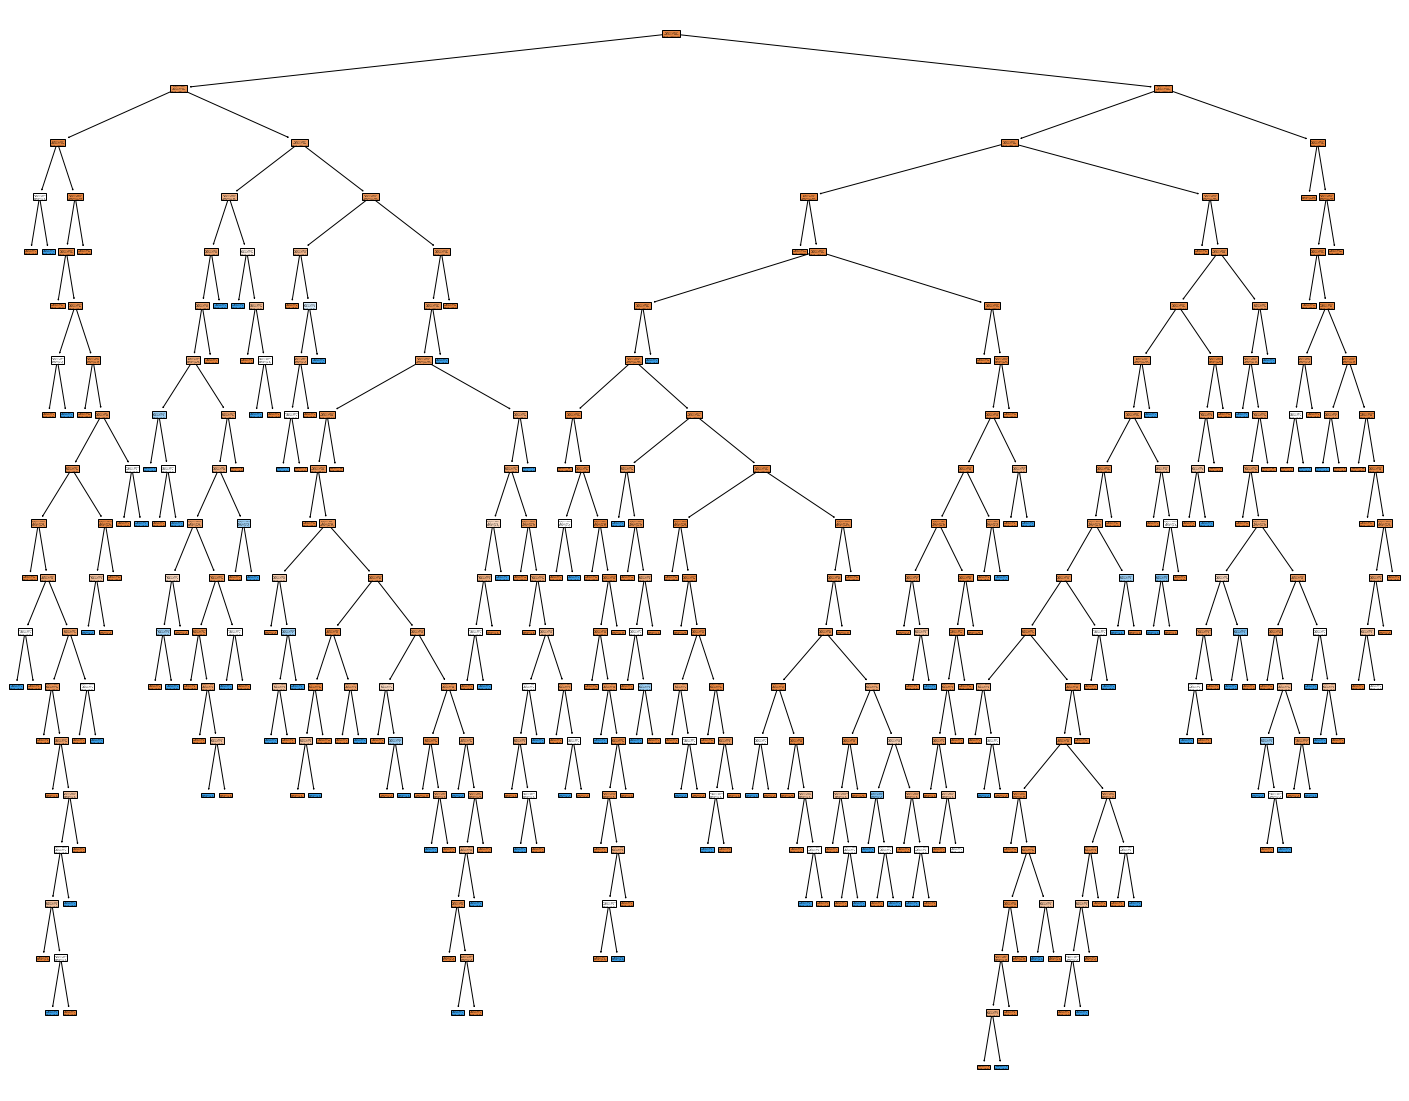

In [23]:
from matplotlib import pyplot as plt
from sklearn import tree

fig = plt.figure(figsize = (25,20))
tree.plot_tree(clf, filled = True)

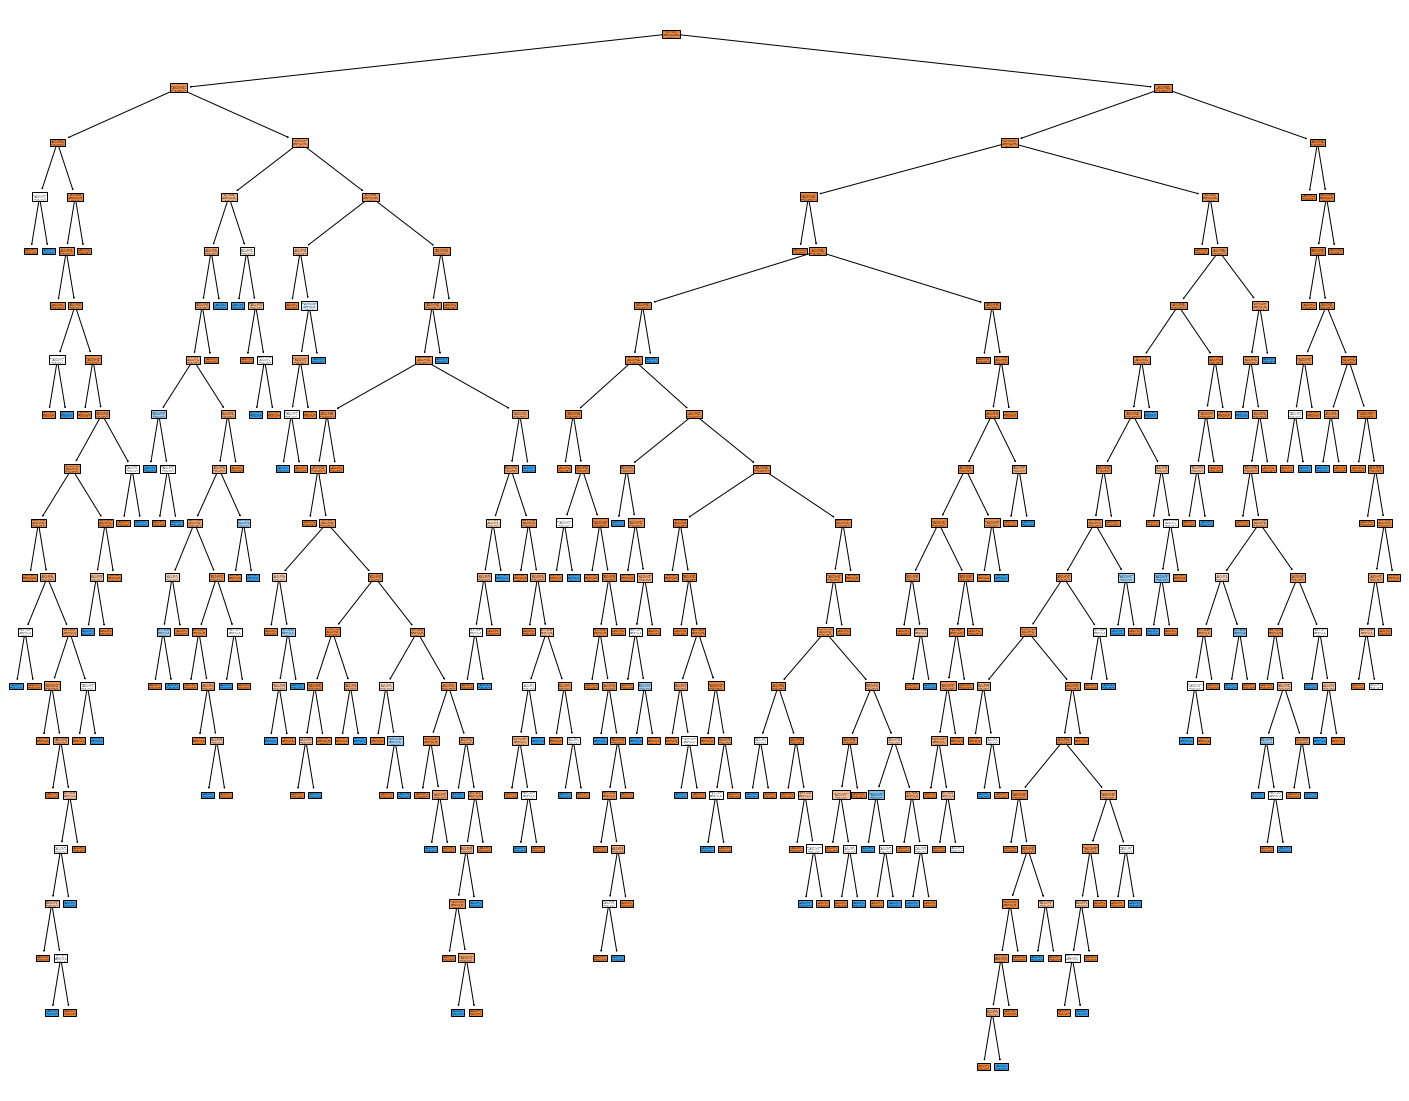

In [24]:
#Menampilkan struktur Decision Tree
from sklearn import tree

feature_names = x.columns[:4]
target_names = y.unique().tolist()

target_names = [str(x) for x in target_names]

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                  feature_names = feature_names,
                  class_names = target_names,
                  filled = True)

##### Decision Tree dengan Pruning

In [25]:
#Create Decision Tree classifier object
clf_p = DecisionTreeClassifier(criterion = "entropy", max_depth = 3)

# Train Decision Tree Classifier
clf_p = clf_p.fit(x_train, y_train)

#Predict the response for test dataset
y_pred_p = clf_p.predict(x_test)

#Model Accuracy, how often is the classifier correct
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_p))

Accuracy:  0.9523809523809523


[Text(0.5416666666666666, 0.875, 'X[0] <= 24.45\nentropy = 0.272\nsamples = 2098\nvalue = [2000, 98]'),
 Text(0.3333333333333333, 0.625, 'X[3] <= 84.238\nentropy = 0.369\nsamples = 1341\nvalue = [1246, 95]'),
 Text(0.16666666666666666, 0.375, 'X[3] <= 77.5\nentropy = 0.192\nsamples = 608\nvalue = [590, 18]'),
 Text(0.08333333333333333, 0.125, 'entropy = 0.0\nsamples = 161\nvalue = [161, 0]'),
 Text(0.25, 0.125, 'entropy = 0.244\nsamples = 447\nvalue = [429, 18]'),
 Text(0.5, 0.375, 'X[0] <= 23.05\nentropy = 0.485\nsamples = 733\nvalue = [656, 77]'),
 Text(0.4166666666666667, 0.125, 'entropy = 0.647\nsamples = 236\nvalue = [197, 39]'),
 Text(0.5833333333333334, 0.125, 'entropy = 0.39\nsamples = 497\nvalue = [459, 38]'),
 Text(0.75, 0.625, 'X[1] <= 33.45\nentropy = 0.037\nsamples = 757\nvalue = [754, 3]'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 449\nvalue = [449, 0]'),
 Text(0.8333333333333334, 0.375, 'X[2] <= 28.45\nentropy = 0.079\nsamples = 308\nvalue = [305, 3]'),

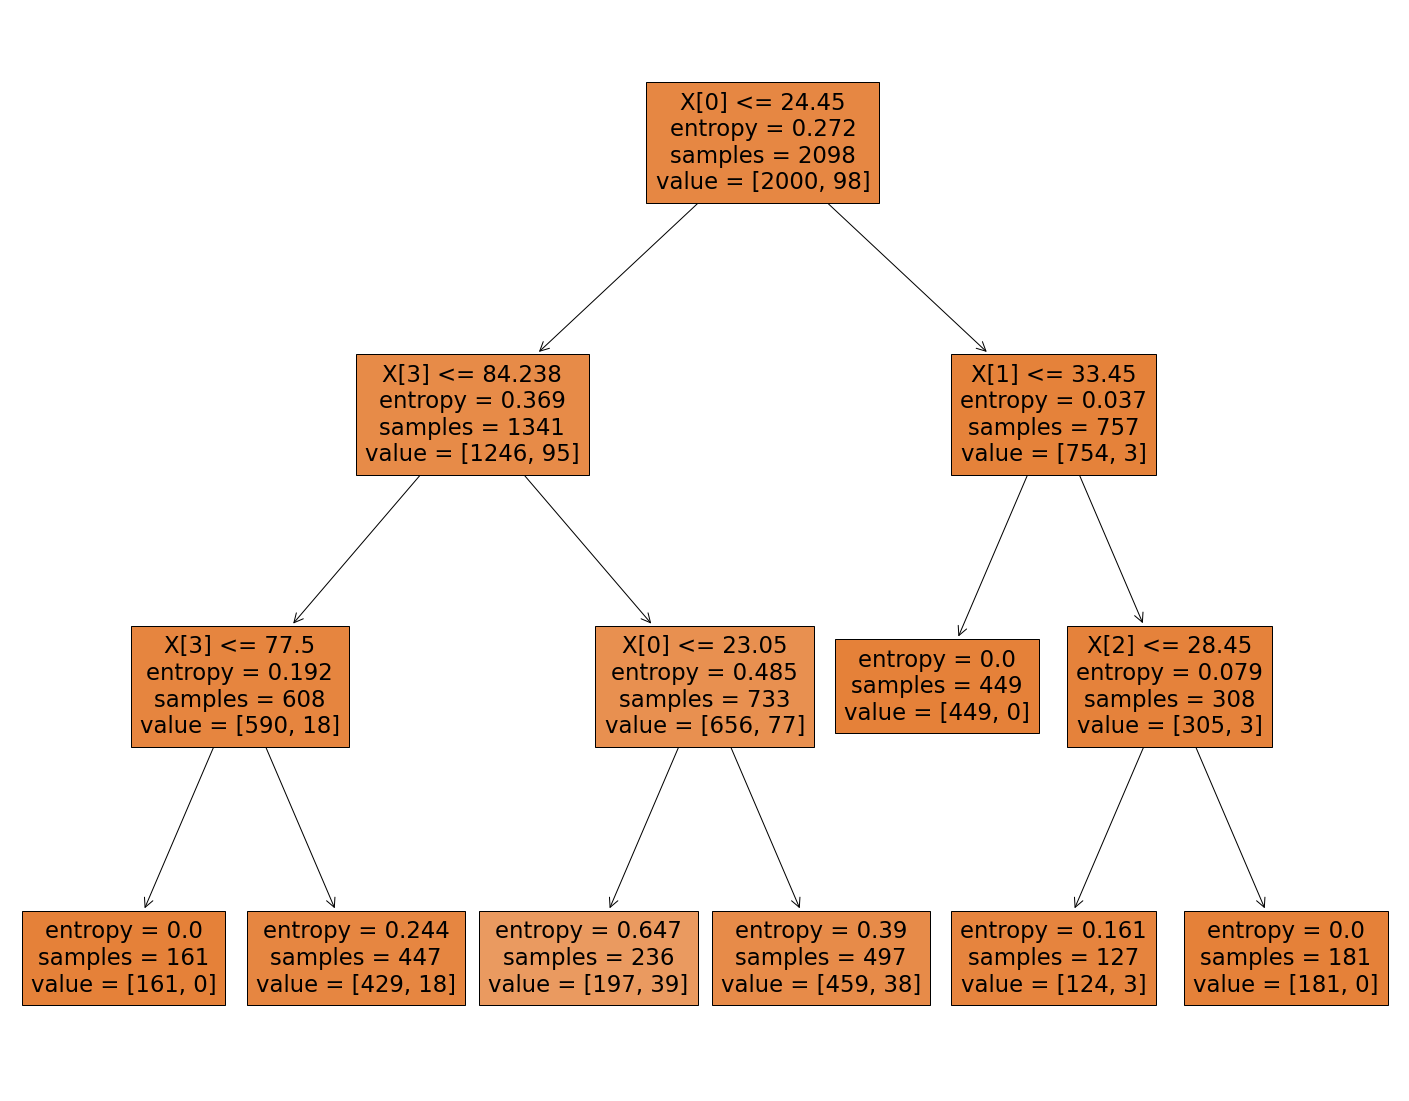

In [26]:
from matplotlib import pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf_p, filled=True)

# EVALUATION

###### Validasi dengan Confusion Matrix

In [27]:
#Libraries untuk menampilkan Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

Text(83.40000000000006, 0.5, 'predicted label')

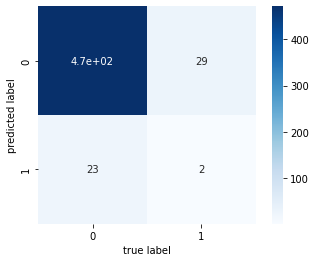

In [28]:
#Menampilkan Confusion Matrix multiple output algoritma Decision Tree tanpa pruning

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat, square = True, annot = True, cmap = 'Blues')
plt.xlabel('true label')
plt.ylabel('predicted label')

In [29]:
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Precision: 0.065
Recall: 0.080
Accuracy: 0.901


Text(83.40000000000006, 0.5, 'predicted label')

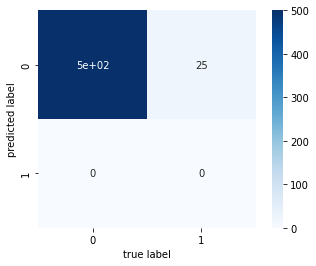

In [30]:
#Menampilkan Confusion Matrix multiple output algoritma Decision Tree dengan pruning

matw = confusion_matrix(y_test, y_pred_p)
sns.heatmap(matw.T, square = True, annot = True, cmap = 'Blues')
plt.xlabel('true label')
plt.ylabel('predicted label')

In [31]:
print('Precision: %.3f' % precision_score(y_test, y_pred_p))
print('Recall: %.3f' % recall_score(y_test, y_pred_p))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_p))

Precision: 0.000
Recall: 0.000
Accuracy: 0.952


C:\Users\catty\anaconda3\envs\environment_baru\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### Perbandingan akurasi algoritma Decision Tree tanpa pruning dan dengan pruning

In [32]:
print('Accuracy Decision Tree dengan Pruning: %.3f' % accuracy_score(y_test, y_pred))
print('Accuracy Decision Tree tanpa Pruning: %.3f' % accuracy_score(y_test, y_pred_p))

Accuracy Decision Tree dengan Pruning: 0.901
Accuracy Decision Tree tanpa Pruning: 0.952
